### 3. Logistic regression

In [2]:
import pandas as pd
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('df_next.csv')
data = data.drop(columns="Unnamed: 0")
data.head(-20)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0000
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0000
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0000
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0000
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
357916,7.0,32.0,70.0,2.0,4.0,69.0,3.0,4.0,138.0,5.0,1.0,1.0000
357917,7.0,17.0,11.0,2.0,10.0,12.0,4.0,10.0,25.0,9.0,1.0,20.1772
357918,7.0,2.0,75.0,0.0,7.0,72.0,0.0,7.0,142.0,2.0,1.0,10.0000
357919,7.0,26.0,49.0,2.0,16.0,49.0,4.0,16.0,98.0,9.0,1.0,20.0950


In [4]:
y = data.iloc[:,0].values
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = y.shape[1]

X = data.iloc[:,1:].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
print("Shape_train:", X_train.shape, "\n"
      "Shape_test: ", X_test.shape, "\n"
      "Shape_y:    ", y.shape)

Shape_train: (239820, 11) 
Shape_test:  (118121, 11) 
Shape_y:     (357941, 8)


In [5]:
scaler = StandardScaler()
clf = OneVsRestClassifier(LogisticRegression(penalty='l2', random_state=0))

steps = [('normalizer', scaler),('classifier', clf)]
pipe_log_ = Pipeline(steps)

In [6]:
pipe_log_reg = pipe_log_.fit(X_train, y_train)

y_pred_train = pipe_log_reg.predict(X_train)
y_pred_test = pipe_log_reg.predict(X_test)
y_score_log_reg = pipe_log_reg.decision_function(X_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sn

In [8]:
target_names = ['DoS', 'Data_probing', 'Malitious_control', 'Malitious_operation', 'Scan',
                'Spying', 'Wrong_SetUp', 'Normal']
print(classification_report(y_train, y_pred_train, target_names=target_names))
print(classification_report(y_test, y_pred_test, target_names=target_names))

                     precision    recall  f1-score   support

                DoS       0.96      0.66      0.78      3878
       Data_probing       1.00      0.59      0.74       235
  Malitious_control       0.97      0.92      0.95       609
Malitious_operation       1.00      0.50      0.67       540
               Scan       0.95      0.45      0.61      1019
             Spying       0.00      0.00      0.00       348
        Wrong_SetUp       0.92      1.00      0.96        71
             Normal       0.98      1.00      0.99    233120

          micro avg       0.98      0.99      0.99    239820
          macro avg       0.85      0.64      0.71    239820
       weighted avg       0.98      0.99      0.98    239820
        samples avg       0.98      0.99      0.99    239820

                     precision    recall  f1-score   support

                DoS       0.97      0.65      0.77      1902
       Data_probing       1.00      0.58      0.73       107
  Malitious_control 

##### Confusion matrix multiclass (Logistic Regression)

In [9]:
confusion_m = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

def plot_confusion_matrix(confusion_m, classes,
                          normalize=False,
                          title=' ',
                          cmap=plt.cm.BuPu):

    import itertools
    if normalize:
        confusion_m = confusion_m.astype('float') / confusion_m.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix (Normalized)")
    else:
        print('Confusion matrix (without_normalization)')

    print(confusion_m)

    plt.imshow(confusion_m, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion_m.max() / 2.
    for i, j in itertools.product(range(confusion_m.shape[0]), range(confusion_m.shape[1])):
        plt.text(j, i, format(confusion_m[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confusion_m[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix (without_normalization)
[[  1229      0      0      0      0      0      0    673]
 [     0     62      0      0      0      0      0     45]
 [     0      0    261      0      0      0      0     19]
 [     0      0      0    117      0      0      0    148]
 [     5      0      7      0    247      0      0    269]
 [     0      0      0      0     14      0      0    170]
 [     0      0      0      0      0      0     51      0]
 [   142      0      3      0      1      0      1 114657]]


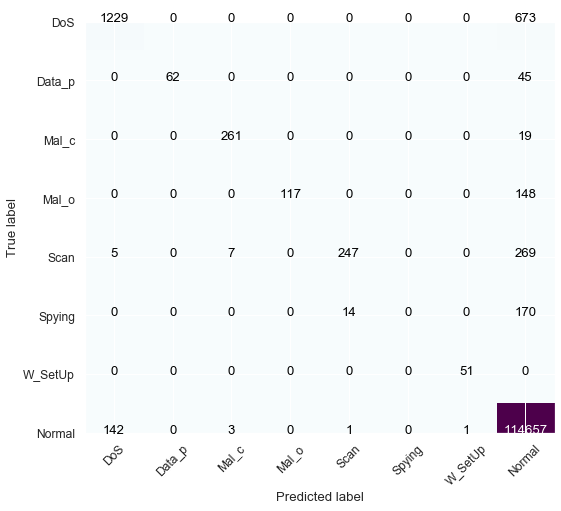

In [10]:
plt.figure(figsize = (8,8))
sn.set(font_scale=1.1)

plot_confusion_matrix(confusion_m,['DoS', 'Data_p', 'Mal_c', 'Mal_o', 'Scan',
                'Spying', 'W_SetUp', 'Normal'])
plt.show()

##### Matthews correlation coefficient (Logistic Regression)

In [11]:
matthews_corrcoef(y_train.argmax(axis=1), y_pred_train.argmax(axis=1))

0.7466185099411375

In [12]:
matthews_corrcoef(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

0.7393013448820681